##### Task 1 : Load the Amazon Fine Food Review dataset, select the first 10,000 rows, and perform a comprehensive Exploratory Data Analysis (EDA) followed by necessary preprocessing steps.

In [17]:
import pandas as pd

# Load the dataset
file_path = "Reviews.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Select the first 10,000 rows
df = df.head(10000)

# Display basic information
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [18]:
# Data Exploration


# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [19]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


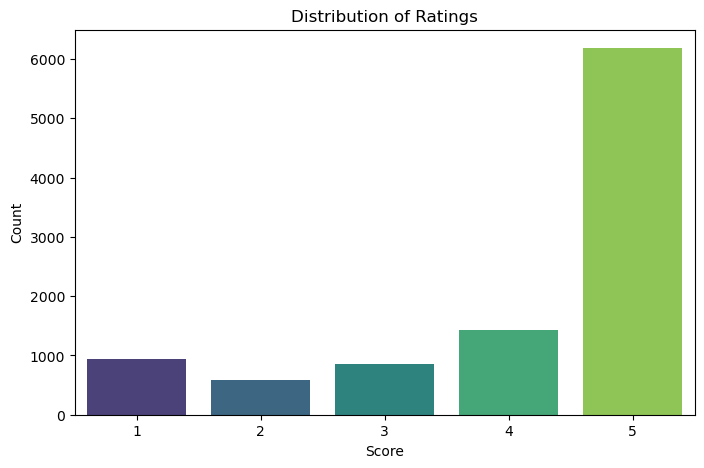

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of ratings
plt.figure(figsize=(8,5))
sns.countplot(x=df['Score'], palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

c:\Users\mohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


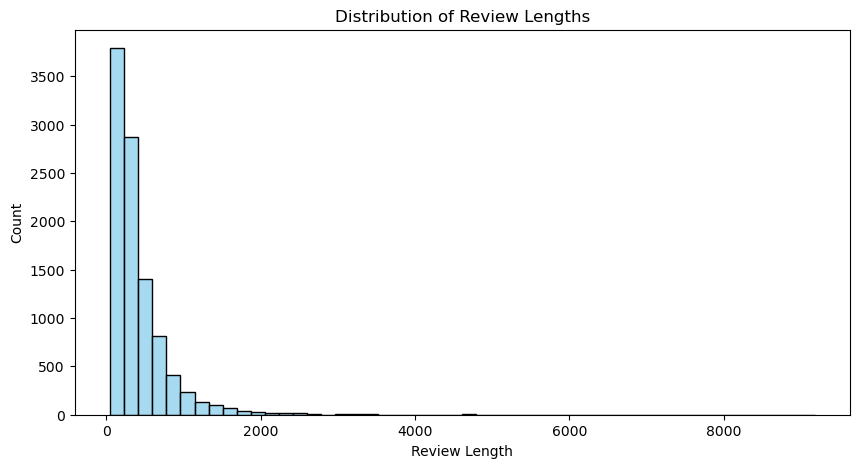

In [21]:
# Analyzing the length of reviews
df['Review_Length'] = df['Text'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 5)) 
sns.histplot(df['Review_Length'], bins=50, color='skyblue')
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.show()

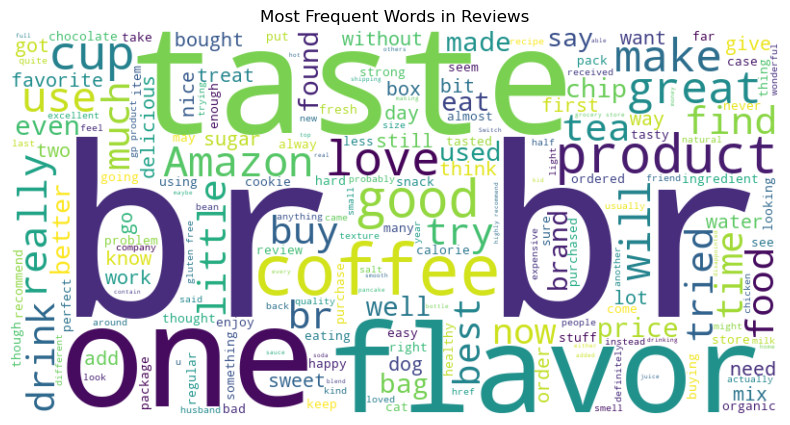

In [22]:
from wordcloud import WordCloud

# Concatenating all reviews
text_data = " ".join(review for review in df['Text'])

# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Reviews")
plt.show()


In [23]:
# Preprocessing Steps

# there is no missing value and no duplicate - so nothing needs to be done there.

# Converting Timestamp to Datetime

df['Time'] = pd.to_datetime(df['Time'], unit='s')  # Convert Unix timestamp to readable format

# print the first few rows of the 'Time' column
print(df['Time'].head())  


0   2011-04-27
1   2012-09-07
2   2008-08-18
3   2011-06-13
4   2012-10-21
Name: Time, dtype: datetime64[ns]


In [24]:
# Text Cleaning (Lowercasing, Removing Punctuation, Stopwords)
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^\w\s]', '', text)  # Removing punctuation
    text = " ".join(word for word in text.split() if word not in stop_words)  # Removing stopwords
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)
# Display the first few rows after preprocessing    
df[['Text', 'Cleaned_Text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Cleaned_Text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


#### Task 2 : Implementing Parsing Algorithms 

##### 1. Display the POS tagging on the first 2 rows of ‘Text’ 



In [72]:
import nltk

# Downloads the Punkt tokenizer model for word and sentence tokenization
nltk.download('punkt')

# Downloads the POS tagging model for part-of-speech (POS) tagging,
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/apande342@apac.comcast.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/apande342@apac.comcast.com/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [73]:
# Select the first 2 rows of 'Text'
sample_texts = df['Cleaned_Text'].iloc[:2]

for i, text in enumerate(sample_texts):
    print(f"\n--- POS Tagging for line #{i+1} ---")
    
    # Tokenize the sentence into words
    words = nltk.word_tokenize(text)
    
    # Apply POS tagging
    pos_tags = nltk.pos_tag(words)
    
    print(pos_tags)  # Display the POS tags



--- POS Tagging for line #1 ---
[('bought', 'VBD'), ('several', 'JJ'), ('vitality', 'NN'), ('canned', 'VBD'), ('dog', 'JJ'), ('food', 'NN'), ('products', 'NNS'), ('found', 'VBD'), ('good', 'JJ'), ('quality', 'NN'), ('product', 'NN'), ('looks', 'VBZ'), ('like', 'IN'), ('stew', 'NN'), ('processed', 'VBN'), ('meat', 'NN'), ('smells', 'NNS'), ('better', 'RBR'), ('labrador', 'NN'), ('finicky', 'JJ'), ('appreciates', 'VBZ'), ('product', 'NN'), ('better', 'RBR')]

--- POS Tagging for line #2 ---
[('product', 'NN'), ('arrived', 'VBD'), ('labeled', 'JJ'), ('jumbo', 'NN'), ('salted', 'VBD'), ('peanutsthe', 'NN'), ('peanuts', 'NNS'), ('actually', 'RB'), ('small', 'JJ'), ('sized', 'VBN'), ('unsalted', 'JJ'), ('sure', 'JJ'), ('error', 'NN'), ('vendor', 'NN'), ('intended', 'VBN'), ('represent', 'JJ'), ('product', 'NN'), ('jumbo', 'NN')]


##### 2. Plot the dependency parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. Make sure that dependency parser looks good and should visually understandable. 

In [74]:
import spacy  # NLP library for text processing
import random
import time
from spacy import displacy  # For visualizing dependency trees

# Load the English language model with arc-eager parsing
nlp = spacy.load("en_core_web_sm")

# Function to get random long sentences
def get_long_sentences(df, num_sentences=2, min_length=10):
    """
    Extracts random sentences from the dataset that have at least 10 words.
    """
    long_sentences = [text for text in df['Cleaned_Text'] if len(text.split()) >= min_length]

    return random.sample(long_sentences, min(num_sentences, len(long_sentences)))

# Get two random sentences from the dataset
selected_sentences = get_long_sentences(df, num_sentences=2)

# Start timer
start_time = time.time()

for i, sentence in enumerate(selected_sentences):
    print(f"\n--- Arc-Eager Dependency Parsing for Sentence {i+1} ---")
        
    # Process the sentence with spaCy NLP model
    doc = nlp(sentence)

    # Extract dependency parsing using arc-eager approach
    print("\nToken\tHead\tDependency")
    for token in doc:
        print(f"{token.text}\t{token.head.text}\t{token.dep_}")

    # Render the arc-eager dependency parse tree using displacy
    displacy.render(doc, style="dep", jupyter=True, options={"compact": True, "distance": 100})

# End timer and calculate elapsed time
arc_eager_time = time.time() - start_time

# Print results
print(f"Arc-Eager Parsing Time (spaCy): {arc_eager_time:.4f} seconds")



--- Arc-Eager Dependency Parsing for Sentence 1 ---

Token	Head	Dependency
really	good	advmod
good	product	amod
product	tighten	nsubj
little	trouble	amod
trouble	product	appos
first	times	amod
couple	times	compound
times	product	appos
did	tighten	aux
nt	tighten	neg
tighten	tighten	ROOT
lid	tighten	dobj
besides	tighten	prep
good	item	amod
item	besides	pobj



--- Arc-Eager Dependency Parsing for Sentence 2 ---

Token	Head	Dependency
things	oreo	nsubj
low	oreos	amod
cal	oreos	nmod
oreos	things	appos
minus	oreos	prep
creme	minus	compound
minus	things	prep
cookie	title	compound
title	things	conj
oreo	oreo	ROOT
basically	total	advmod
total	sugar	amod
misnomer	nothing	compound
nothing	crackers	nmod
black	crackers	amod
crackers	sugar	compound
sugar	want	nsubj
want	oreo	ccomp
click	want	xcomp
purchase	click	dobj


Arc-Eager Parsing Time (spaCy): 0.0117 seconds


##### 3. Plot the Statistical parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. Make sure that Statistical parser looks good and should visually understandable.

In [75]:
!pip install nltk
!wget -nc https://nlp.stanford.edu/software/stanford-parser-full-2018-10-17.zip
!unzip -n stanford-parser-full-2018-10-17.zip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
File ‘stanford-parser-full-2018-10-17.zip’ already there; not retrieving.

Archive:  stanford-parser-full-2018-10-17.zip


/var/folders/1f/dm5s4qdd0291zc_k12jkmy9c0000gp/T/ipykernel_39908/2356007466.py:15: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  pcfg_parser = StanfordParser(parser_path, model_path)



--- PCFG Statistical Parsing for Sentence 1 ---
                                                                                 ROOT                                                            
                                                                                  |                                                               
                                                                                 SINV                                                            
       ___________________________________________________________________________|___________________________________________                    
      |                                                    VP                                                                 |                  
      |                         ___________________________|________                                                          |                   
      |                        |                                    S   

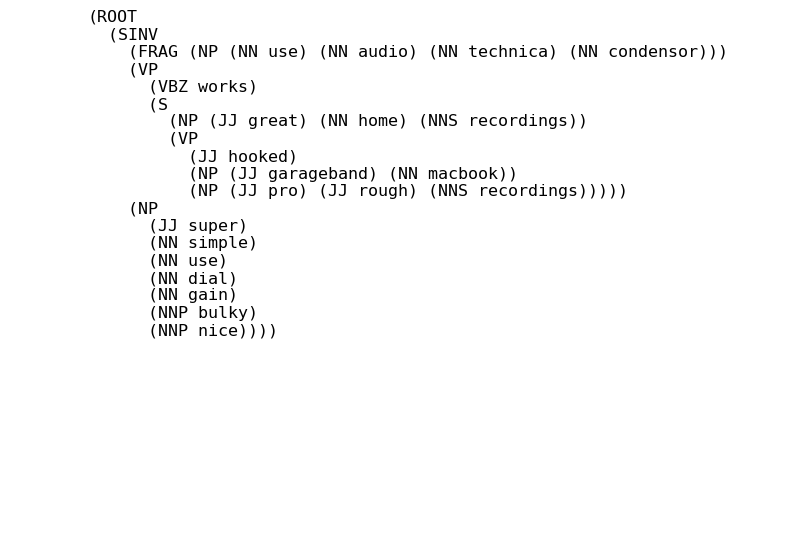


--- PCFG Statistical Parsing for Sentence 2 ---
      ROOT                                                                                                                                                                                                
       |                                                                                                                                                                                                   
       S                                                                                                                                                                                                  
       |                                                                                                                                                                                                   
       VP                                                                                                                                

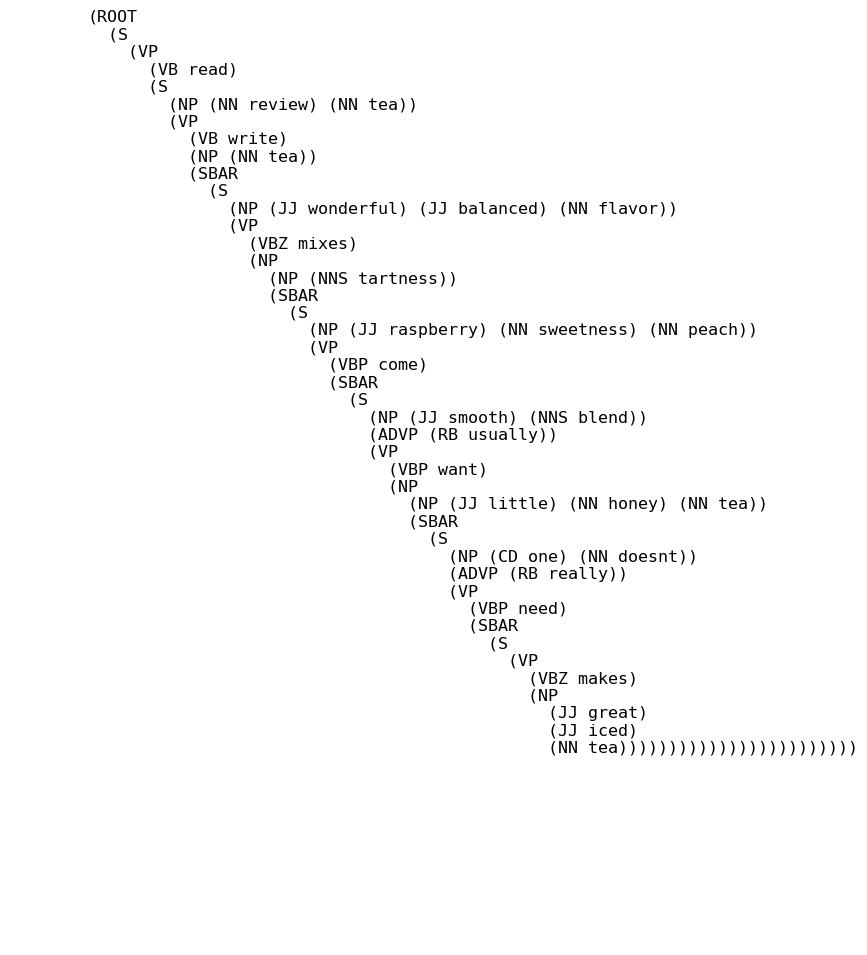

PCFG Parsing Time (Stanford Parser): 1.4107 seconds


In [76]:
import os
import time
from nltk.parse.stanford import StanfordParser
import matplotlib.pyplot as plt

# Set Stanford Parser environment variables
os.environ["STANFORD_PARSER"] = "stanford-parser-full-2018-10-17"
os.environ["STANFORD_MODELS"] = "stanford-parser-full-2018-10-17"

# Path to Stanford Parser files
parser_path = "stanford-parser-full-2018-10-17/stanford-parser.jar"
model_path = "stanford-parser-full-2018-10-17/stanford-parser-3.9.2-models.jar"

# Load PCFG parser
pcfg_parser = StanfordParser(parser_path, model_path)

# Use the same random long sentences from the earlier question 
# helps in time comparision
selected_sentences = get_long_sentences(df, num_sentences=2)

# Start timer
start_time = time.time()

# Function to plot PCFG parse tree
def plot_parse_tree(sentence):
    """
    Parses and plots a PCFG parse tree for the given sentence.
    
    Parameters:
    sentence (str): Input sentence for parsing.
    """
    # Generate parse tree
    parse_tree = list(pcfg_parser.raw_parse(sentence))[0]
    
    # Plot tree
    parse_tree.pretty_print()
    
    # Save tree plot
    plt.figure(figsize=(10, 5))
    tree_text = parse_tree.pformat()
    plt.text(0.1, 0.5, tree_text, fontsize=12, family="monospace")
    plt.axis("off")
    plt.show()

# Parse and plot trees for both sentences
for i, sentence in enumerate(selected_sentences):
    print(f"\n--- PCFG Statistical Parsing for Sentence {i+1} ---")
    plot_parse_tree(sentence)

# End timer and calculate elapsed time
pcfg_time = time.time() - start_time

# Print results
print(f"PCFG Parsing Time (Stanford Parser): {pcfg_time:.4f} seconds")


##### 4. Compare the efficiency of each approach in terms of the number of operations and time taken.

#####  Complexity Analysis

Arc-Eager Dependency Parsing 
Time Complexity: O(n) -> Each word is processed once.
Each token undergoes -  Head assignment (constant time) and Dependency label assignment (constant time). Also Tree structure update (constant time)
Overall Complexity: O(n) (fast, linear)

PCFG Statistical Parsing (Stanford Parser)
Time Complexity: O(n³) -> Requires computing multiple derivations. Slower for long sentences

From the above runs - We get Arc-Eager Parsing Time (spaCy):  0.0117 seconds
and PCFG Parsing Time (Stanford Parser): 1.4107 seconds

So Arch Eager parsing (dependency parsing) is 121 times faster than PCFG Parsing (Statistical parsing).